In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import path

import cv2
from sections import section, VERTEX_FUNCTIONS

## image with matplotlib

In [2]:
def image_mpl(outers, inners, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(1,1))
        
    for outer in outers:
        mppoly = matplotlib.patches.Polygon(outer, facecolor='k', linewidth=0)
        ax.add_patch(mppoly)
    for inner in inners:
        mppoly = matplotlib.patches.Polygon(inner, facecolor='w', linewidth=0)
        ax.add_patch(mppoly)

    ax.autoscale(tight=True)
    ax.set_aspect("equal")
    ax.axis("off")
    
    return ax.figure

## image with opencv

In [3]:
BLACK = (0,0,0)
WHITE = (255,255,255)

def image_cv2(outers, inners, figsize=300, pad=20):
    """Return np.array"""

    mins = np.min(np.concatenate(outers), axis=0)
    maxs = np.max(np.concatenate(outers), axis=0)

    cx = (mins[0] + maxs[0])/2
    cy = (mins[1] + maxs[1])/2
    center = [cx, cy] # in true coordinates

    w = maxs[0] - mins[0]
    h = maxs[1] - mins[1]
    scale = (figsize - 2*pad) / max(w, h)
    
    offset = (figsize//2, figsize//2) # in image coords

    img = 255*np.ones((figsize, figsize, 3), dtype = "uint8") # empty white image

    polys = [(scale * (p - center)).astype(np.int32) for p in outers]
    polys = [p*[1,-1] for p in polys] # flip y
    cv2.fillPoly(img, polys, BLACK, cv2.LINE_AA, 0, offset)

    polys = [(scale * (p - center)).astype(np.int32) for p in inners]
    polys = [p*[1,-1] for p in polys] # flip y
    cv2.fillPoly(img, polys, WHITE, cv2.LINE_AA, 0, offset)
    
    return img


## Example

In [8]:
func_tube, params_tube = VERTEX_FUNCTIONS['tube']
print(params_tube)

['ra', 'ri']


In [9]:
#outers, inners = verts_c2(50, 1.6, 20, 6, 15, 6)
outers, inners = func_tube(50, 49)

In [10]:
#%%timeit
#fig = image_mpl(outers, inners)
#fig.savefig("c:/temp/tube1.png", dpi=150, pad_inches=0)

img = image_cv2(outers, inners)
cv2.imwrite("/home/pagzal/tube1.png", img)

True

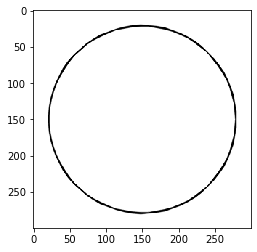

In [11]:
#%%timeit
img = image_cv2(outers, inners)
#cv2.imwrite("c:/temp/c_cv2.png", img) # RGB
plt.imshow(img, aspect='equal', );

In [12]:
func_c, params_c = VERTEX_FUNCTIONS['z1']
print(params_c)

['h', 'tw', 'ba', 'ta', 'bf', 'tf']


In [13]:
outers, inners = func_c(30, 1.8, 20, 2.5, 4, 8)
img = image_cv2(outers, inners)

In [14]:
!ls ~/projects

 2dsection			  okoham.github.io      pytorch_tutorial
 2dshape			  P1_Facial_Keypoints  'Scans IPAD'
 artificial-intelligence-master   patrick_files         tischfussball
 CVND_Exercises			  pointcloud	        uda-da-2
 deep-reinforcement-learning	  pytorch3d_tutorials   uda-da-r


In [30]:
#cv2.imwrite("/home/pagzal/zx.png", img)

True